In [ ]:
'''
Logistic Model for Predicting Late E-Commerce Deliveries
This model identifies which deliveries from an online retailer will be late so the retailer can remedy the issues accordingly.
#Part 3 trains and tests the model and outputs scoring metrics.
Author: Bilal Kudaimi
Date: 2021-06-05
'''

'''
Step-by-step instructions for performing the model selection and evaluation part of my case study:

1. Import the necessary libraries for the model selection and evaluation.
2. Import the code from Part 2 of the project. The data frame of reduced features will be used to build the model.
   The categorical features have already been converted to dummy variables in Part 2, so it should be ready to go.
3. The current data frame of reduced features has column names that are difficult to understand. Change the column labels 
   to make them easier to comprehend.
4. View the data frame as well as a summary of the data to determine if the remaining features have low variances.
5. With the features viewed, assign the target vector to be used to build a logistic regression model then view the vector.
6. Split the data using a 10-fold cross-validation
7. Building and evaluating the logistic regression model. Precision, recall, and F1 scores will be determined.
'''

In [1]:
#Step 1: Importing the necessary libraries for the model building and evaluation
from numpy import mean
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Numerical data summary:
Categorical data summary:


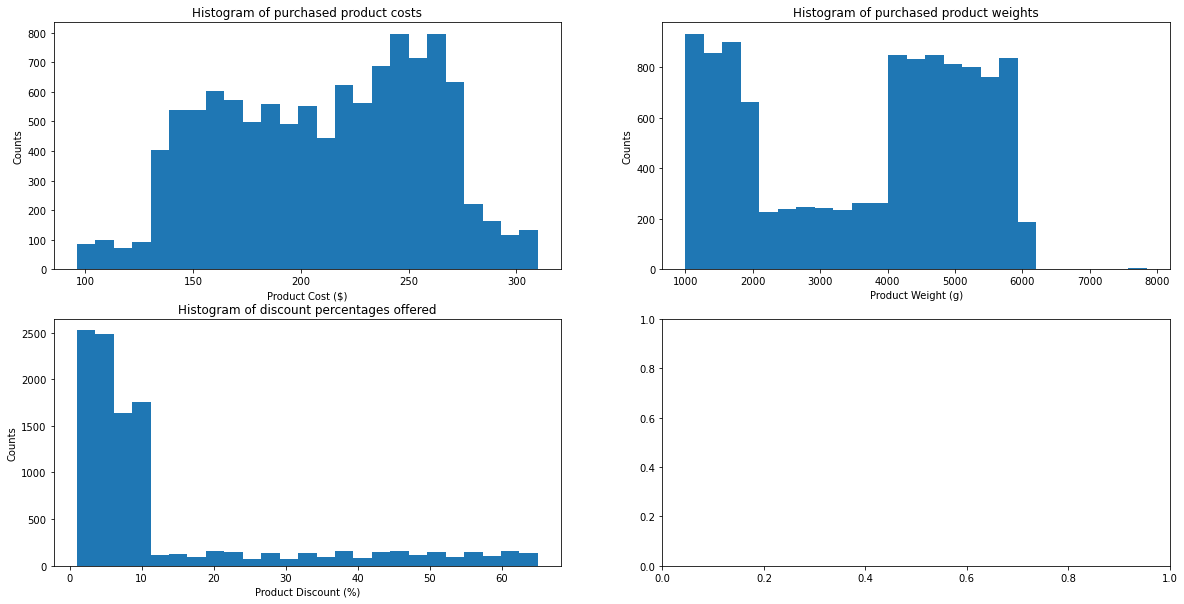

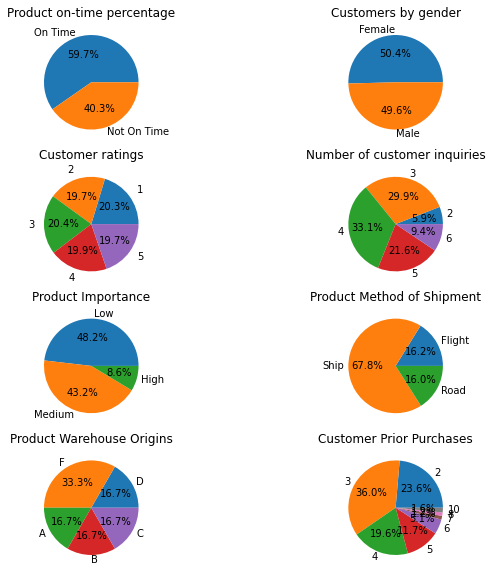

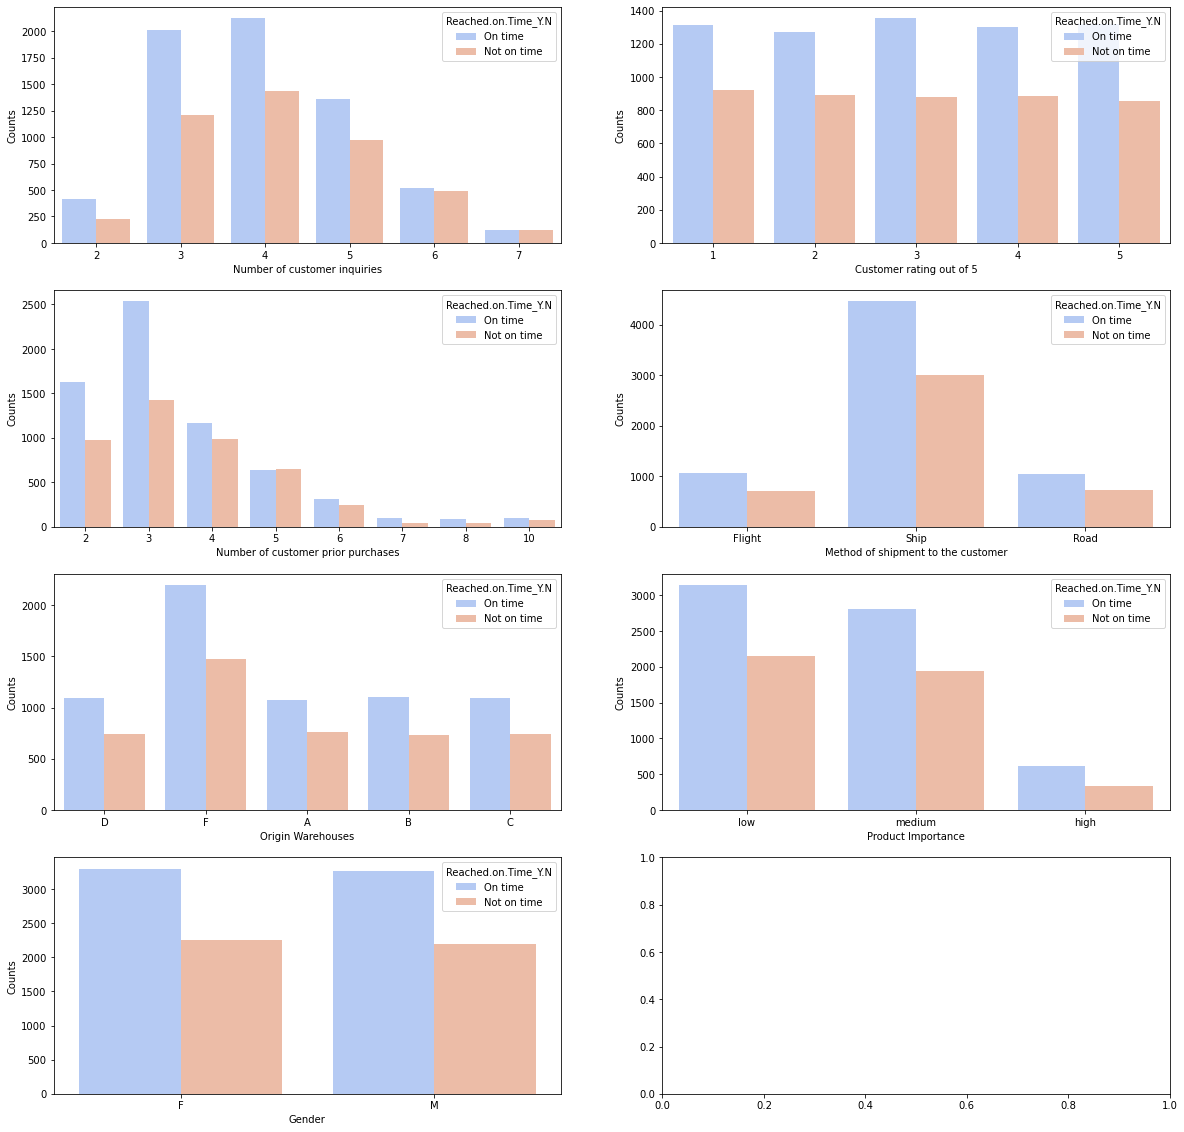

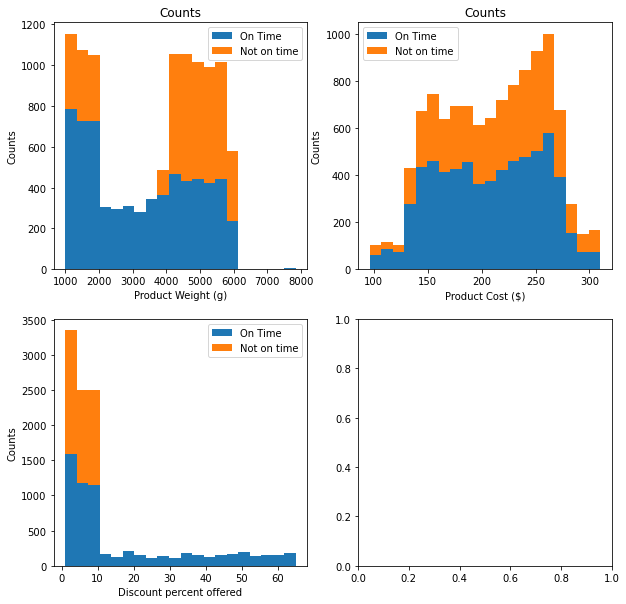

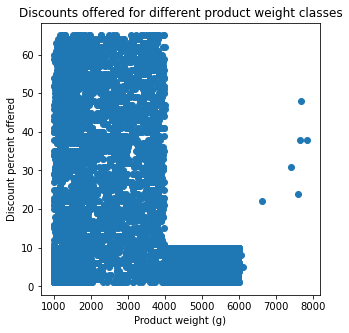

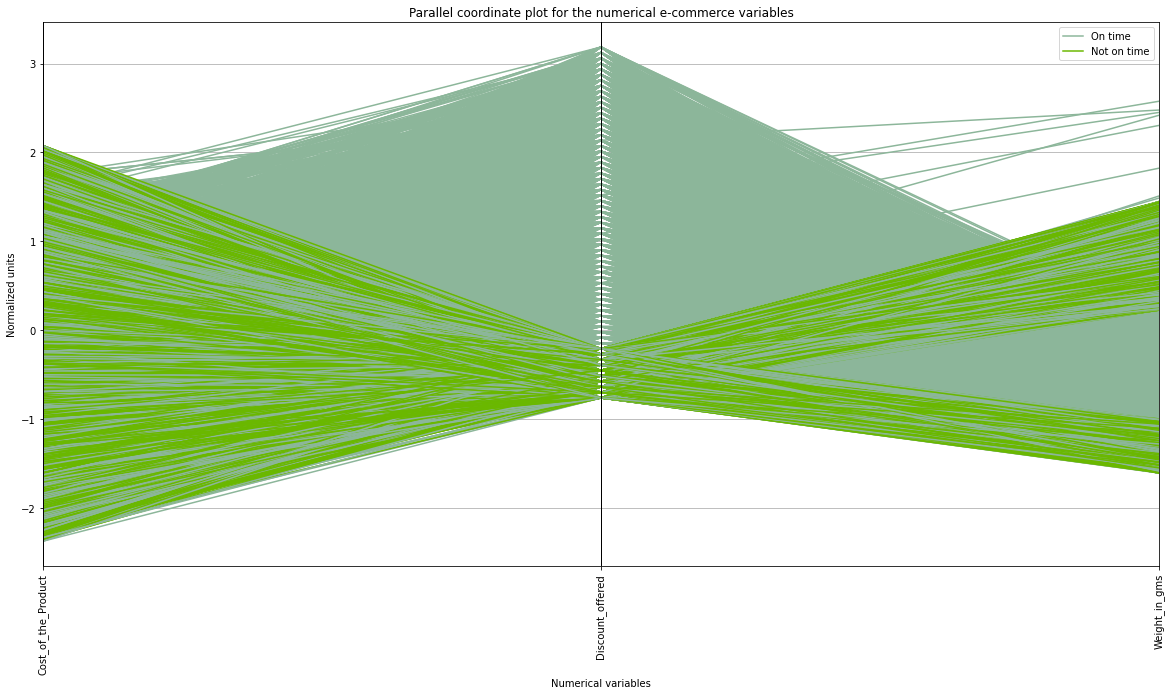

Numerical variable summary: 

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std

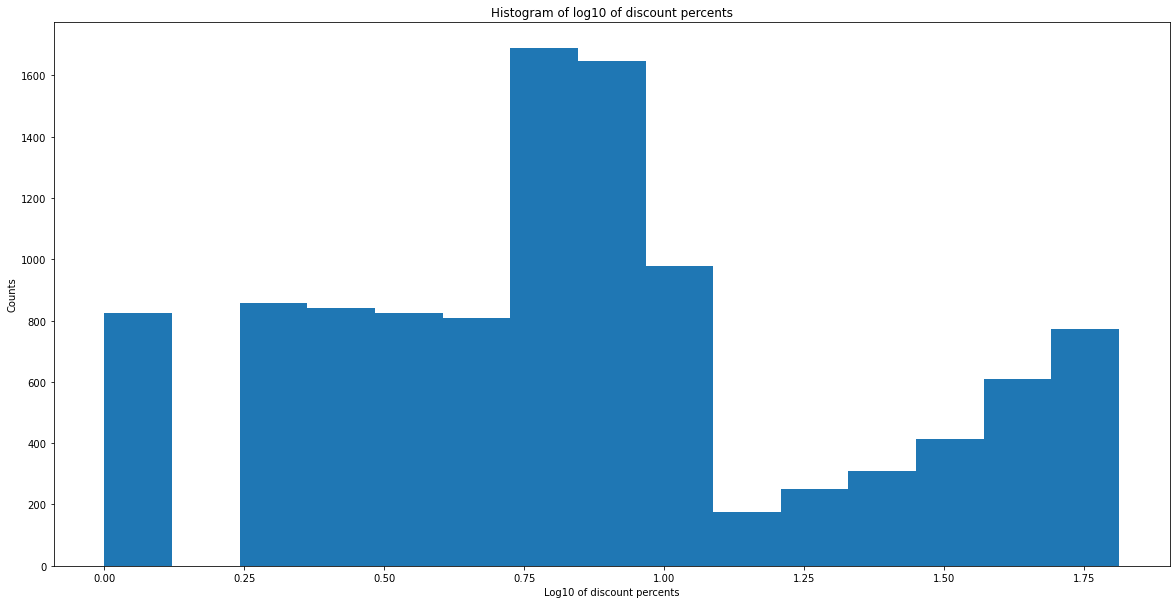

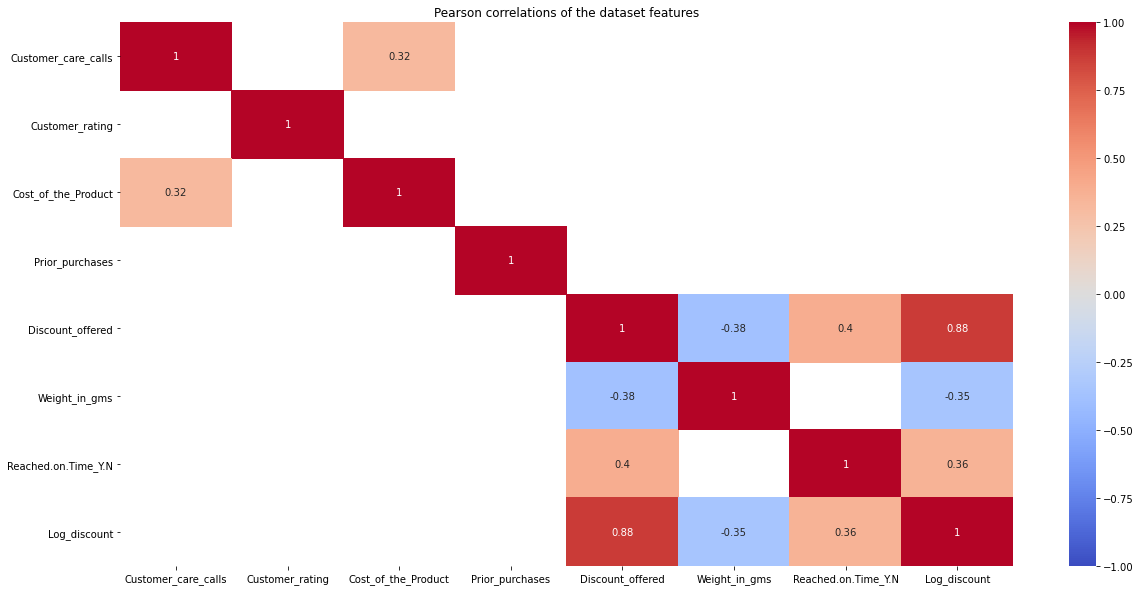

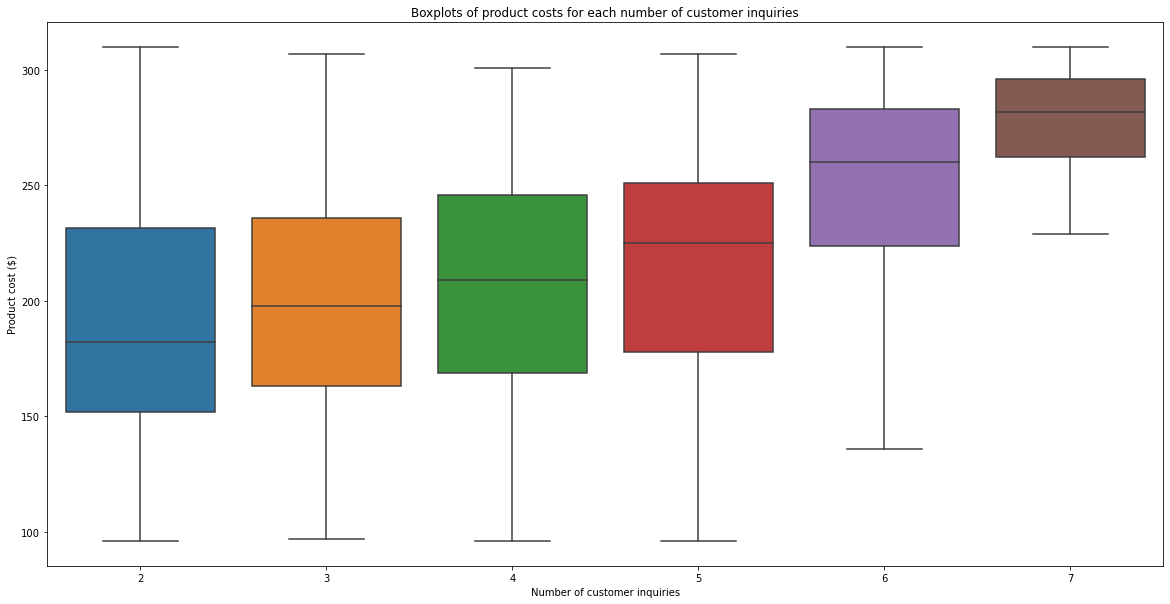

Shape of the dummy variable data frame: (10999, 21)
Features:        Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0                        4                2                  177   
1                        4                5                  216   
2                        2                2                  183   
3                        3                3                  176   
4                        2                2                  184   
...                    ...              ...                  ...   
10994                    4                1                  252   
10995                    4                1                  232   
10996                    5                4                  242   
10997                    5                2                  223   
10998                    2                5                  155   

       Prior_purchases  Discount_offered  Weight_in_gms  Log_discount  \
0                    3                44        

In [2]:
#Step 2: Importing the code from Part 2

from ipynb.fs.full.DSC550FinalProjectPart2 import *

In [3]:
#Step 3: Changing the column names to make them easier to comprehend.

kept_features.columns = ['Log10 of discount', 'Method of Shipment: Road', 'Low Importance Product', 'Medium Importance Product']

In [4]:
#Step 4: Viewing the data frame of kept features and a summary of its data

print(kept_features.head())
print('\n Data summary: \n \n {}'.format(kept_features.describe()))

   Log10 of discount  Method of Shipment: Road  Low Importance Product  \
0           1.643453                       0.0                     1.0   
1           1.770852                       0.0                     1.0   
2           1.681241                       0.0                     1.0   
3           1.000000                       0.0                     0.0   
4           1.662758                       0.0                     0.0   

   Medium Importance Product  
0                        0.0  
1                        0.0  
2                        0.0  
3                        1.0  
4                        1.0  

 Data summary: 
 
        Log10 of discount  Method of Shipment: Road  Low Importance Product  \
count       10999.000000              10999.000000            10999.000000   
mean            0.867903                  0.086190                0.481589   
std             0.470642                  0.280657                0.499684   
min             0.000000             

In [5]:
#Since the target vector for prediction is binary, I will use a simple logistic regression model.

#Step 5: Assigning the target vector to be used for the logistic regression model
target = ecom['Reached.on.Time_Y.N']
print('Target vector: \n \n{}'.format(target))

Target vector: 
 
0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64


In [6]:
#Defining the logistic regression model
logreg = LogisticRegression()

'''
To split my data into training and testing data, I will use repeated k-fold cross validation (KFCV)
rather than train_test_split. My reasoning for this is because train_test_split introduces bias
as not all the data is used for testing. The k-fold cross validation method yields better results 
by alternating the testing fold until all data is used in the testing fold. Repeated KFCV repeats 
the KFCV process a certain number of times to reduce noise in the scores.
'''

#Step 6: Splitting the data using a 10-fold cross-validation
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 0)

In [7]:
#Step 7: Evaluating the logistic regression model and generating the precision, recall, and F1 scores.
#These scores are used instead of accuracy due to the presence of imbalanced classes in the dataset.
scores1 = cross_val_score(logreg, kept_features, target, scoring = 'precision', cv = cv)
scores2 = cross_val_score(logreg, kept_features, target, scoring = 'recall', cv = cv)
scores3 = cross_val_score(logreg, kept_features, target, scoring = 'f1', cv = cv)

#Since the KFCV was run 3 times, the average of each metric will be taken and then reported.
precision = round(mean(scores1), 3)*100
recall = round(mean(scores2), 3)*100
f1 = round(mean(scores3), 3)*100
print('Precision: {} percent'.format(precision))
print('Recall: {} percent'.format(recall))
print('F1 Score: {} percent'.format(f1))

Precision: 64.8 percent
Recall: 76.3 percent
F1 Score: 70.1 percent


In [ ]:
'''
This business problem is primarily a binary classification problem, so I chose to use logistic regression
as a solution. I coupled this with k-fold cross validation rather than train-test splitting to remove biases 
and maximize the values of the precision, recall, and F1 scores. 

The precision and recall values were about 65% and 76%, respectively, resulting in an F1 score of 70%. 
Precision is the percentage of positive classifications that were true positives (True/(True+False)), and 
recall is the ratio of true positives to the sum of true positives and false negatives, since false negatives 
are actually positive. F1 score is the harmonic mean of the two. The scores of 65%, 76% and 70% for the three 
scores are much worse than what I expected, but not too bad for my purposes. This model is only meant to improve 
the reputation of one struggling online retailer, and these scores should be sufficient for that. In my opinion,
if it is to keep a good reputation going forward, it needs to have a model with scores much better than 70%.
This is because customers become more sensitive to late deliveries the higher the on-time delivery rate is. 
The next step would be to improve this model by tuning its hyperparameters. Perhaps the hyperparameters are
why none of the scores are above 80%.
'''